<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [3]:
df['ConvertedComp'].head()

0     61000.0
1     95179.0
2     90000.0
3    455352.0
4     65277.0
Name: ConvertedComp, dtype: float64

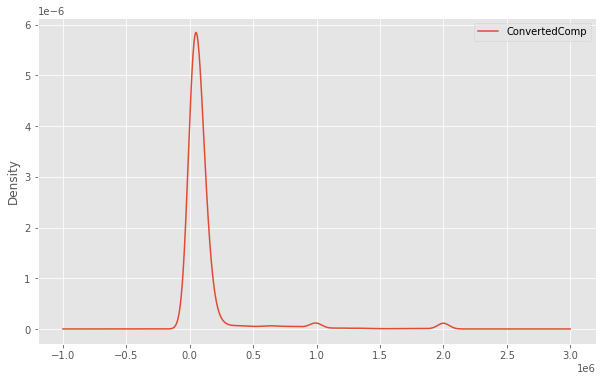

In [4]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
df.plot(kind='kde', y='ConvertedComp', figsize=(10, 6))

Plot the histogram for the column `ConvertedComp`.


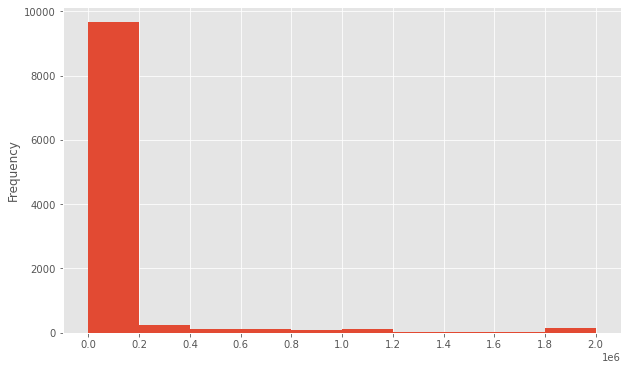

In [5]:
import numpy as np

count, bins = np.histogram(df['ConvertedComp'].dropna())
df.plot(kind='hist', y='ConvertedComp', figsize=(10, 6), xticks=bins, legend=False)

What is the median of the column `ConvertedComp`?


In [6]:
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [7]:
df[df['Gender']=='Man']['Gender'].count()

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
df[df['Gender']=='Woman']['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
df.describe()['Age']

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


Text(0.5, 1.0, "Respondent's Age Distribution")

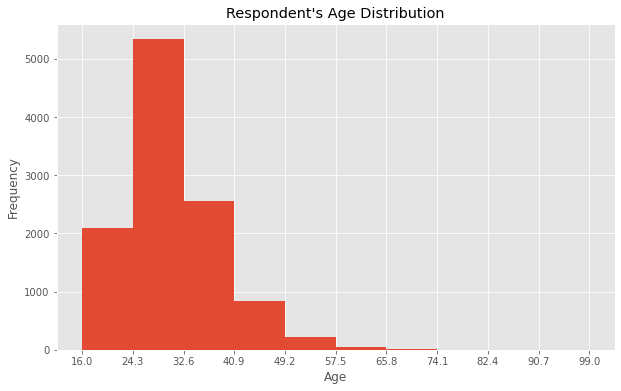

In [10]:
count, bins = np.histogram(df['Age'].dropna())

df.plot(kind='hist', y='Age', figsize=(10, 6), xticks=bins, legend=False)
plt.xlabel('Age')
plt.title('Respondent\'s Age Distribution')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


Text(0.5, 1.0, 'Boxplot for ConvertedComp')

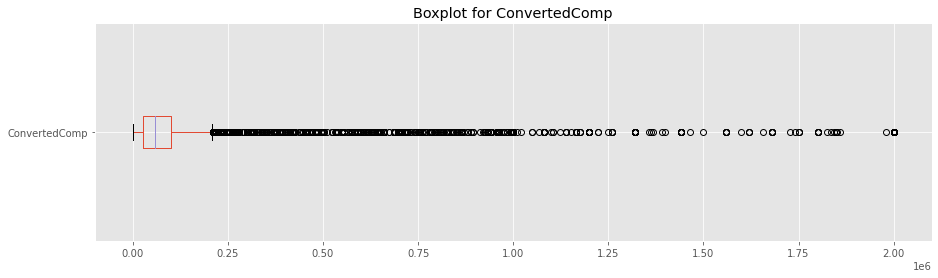

In [11]:
df.plot(kind='box', y='ConvertedComp', figsize=(15, 4), vert=False, legend=False)
plt.title('Boxplot for ConvertedComp')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [12]:
quartiles = df['ConvertedComp'].quantile([0., .25, .5, .75, 1.])
quartiles

0.00          0.0
0.25      26868.0
0.50      57745.0
0.75     100000.0
1.00    2000000.0
Name: ConvertedComp, dtype: float64

Find out the upper and lower bounds.


In [13]:
bounds = {'lower':0, 'upper':0}
IQR = quartiles[0.75] - quartiles[0.25]
bounds['lower'] = quartiles[0.25] - 1.5*IQR
bounds['upper'] = quartiles[0.75] + 1.5*IQR
bounds

{'lower': -82830.0, 'upper': 209698.0}

Identify how many outliers are there in the `ConvertedComp` column.


In [14]:
df[df['ConvertedComp'] > bounds['upper']]['ConvertedComp'].count()

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [15]:
new_df = df[df['ConvertedComp'] < bounds['upper']]

In [16]:
new_df.describe()['ConvertedComp']

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

Text(0.5, 1.0, 'Boxplot for Age')

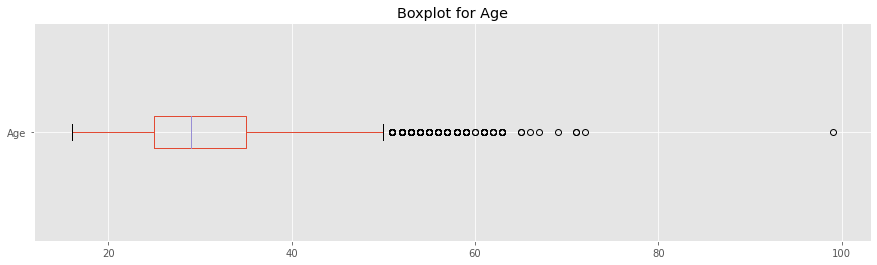

In [17]:
df.plot(kind='box', y='Age', figsize=(15, 4), vert=False, legend=False)
plt.title('Boxplot for Age')

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [18]:
df.corr()['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
